In [46]:
# imports 
from pyforest import *
import warnings
warnings.filterwarnings('ignore')

In [47]:
# read dataset
df_covid = pd.read_csv('dataset/imputed-data.csv',header = 0)
df_covid.head()

<IPython.core.display.Javascript object>

,date,county_fips,county_name,state_fips,state_name,covid_19_confirmed_cases,covid_19_deaths,social_distancing_total_grade,social_distancing_visitation_grade,social_distancing_encounters_grade,...,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_or_higher,immigrant_student_ratio,death_ratio,population_ratio_in_state
0,2020/01/22,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,6,4,3,2,2,0.021048,0.010811,4.46047
1,2020/01/23,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,6,4,3,2,2,0.021048,0.010811,4.46047
2,2020/01/24,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,6,4,3,2,2,0.021048,0.010811,4.46047
3,2020/01/25,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,6,4,3,2,2,0.021048,0.010811,4.46047
4,2020/01/26,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,6,4,3,2,2,0.021048,0.010811,4.46047


In [48]:
# df_informations
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992266 entries, 0 to 992265
Data columns (total 64 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   date                                           992266 non-null  object 
 1   county_fips                                    992266 non-null  int64  
 2   county_name                                    992266 non-null  object 
 3   state_fips                                     992266 non-null  int64  
 4   state_name                                     992266 non-null  object 
 5   covid_19_confirmed_cases                       992266 non-null  float64
 6   covid_19_deaths                                992266 non-null  float64
 7   social_distancing_total_grade                  992266 non-null  object 
 8   social_distancing_visitation_grade             992266 non-null  object 
 9   social_distancing_encounters_grade   

In [49]:
# droping county and state name
# df_covid.drop(['county_name','state_name'],inplace = True, axis = 1)

DROPPED THE STRING COUNTERPARTS OF COUNTY_NAME AND STATE_NAME

In [50]:
# keeping columns name 
col_list = df_covid.columns
col_list

Index(['date', 'county_fips', 'county_name', 'state_fips', 'state_name',
       'covid_19_confirmed_cases', 'covid_19_deaths',
       'social_distancing_total_grade', 'social_distancing_visitation_grade',
       'social_distancing_encounters_grade',
       'social_distancing_travel_distance_grade',
       'retail_and_recreation_mobility_percent_change',
       'grocery_and_pharmacy_mobility_percent_change',
       'workplaces_mobility_percent_change', 'daily_state_test',
       'precipitation', 'temperature', 'percent_of_vaccinated_residents',
       'virus_pressure', 'total_population', 'proportion_female', 'area',
       'population_density', 'latitude', 'longitude', 'hospital_beds_ratio',
       'ventilator_capacity_ratio', 'intensive_care_unit_(ICU)_bed_ratio',
       'housing_density', 'less_than_high_school_diploma',
       'high_school_diploma_only', 'some_college_or_higher',
       'academic_population_ratio', 'percent_of_smokers',
       'percent_of_diabetes', 'religious_congr

In [51]:
# date as date format
df_covid['date'] = pd.to_datetime(df_covid['date'])
df_covid['date'].head()

<IPython.core.display.Javascript object>

0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
Name: date, dtype: datetime64[ns]

CONVERTED DATE STRING TO DATE FORMAT

In [52]:
# max date
df_covid['date'].max()

Timestamp('2021-06-10 00:00:00')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

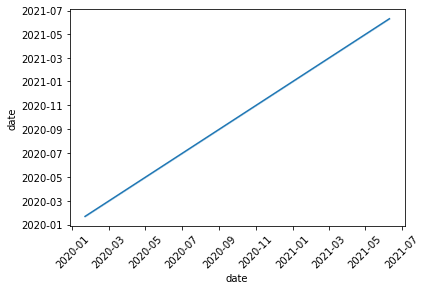

In [53]:
# checking pattern of date
sns.lineplot(x = 'date',y = 'date',data = df_covid )
plt.xticks(rotation=45);
plt.show()

OUR DATETIME IS CONTINUOUS

In [54]:
# country fipes unique len
len(df_covid.county_fips.unique())

1961

In [57]:
# state fipes unique
len(df_covid.state_fips.value_counts())

49

In [58]:
# dividing dataset into waves (first)
df_covid = df_covid[(df_covid['date'] >= '2020-09-01') & (df_covid['date'] <= '2021-03-01')]
df_covid['date'].max()

Timestamp('2021-03-01 00:00:00')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='temperature', ylabel='covid_19_confirmed_cases'>

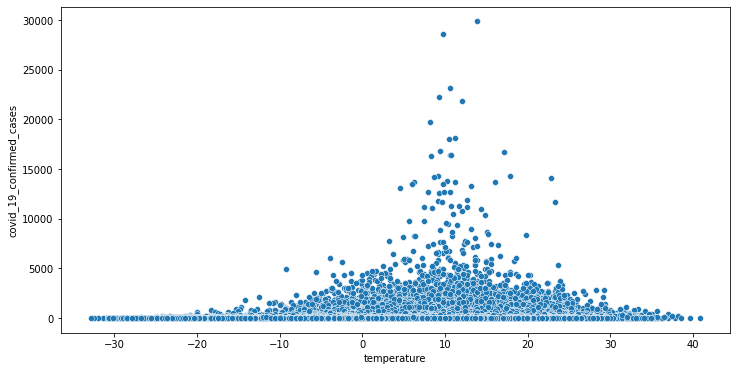

In [59]:
# overall temperature vs covid cases
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'temperature',y = 'covid_19_confirmed_cases',data = df_covid)

MAJORITY OF THE CASES ARE DETECTED WHEN TEMPERATURE IS BETWEEN -15 TO 40

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='date', ylabel='covid_19_confirmed_cases'>

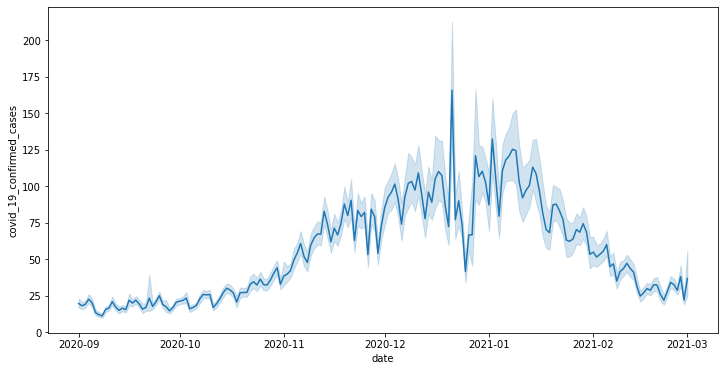

In [60]:
# overall date vs covid cases
plt.figure(figsize = (12,6))
sns.lineplot(x = 'date', y = 'covid_19_confirmed_cases', data = df_covid)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='date', ylabel='daily_state_test'>

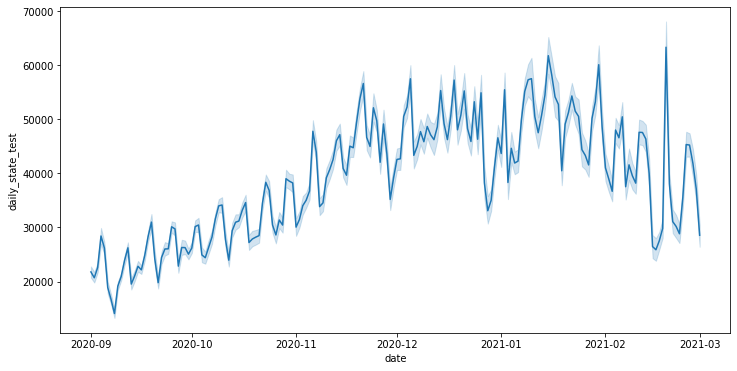

In [61]:
# overall date vs daily_state_test
plt.figure(figsize = (12,6))
sns.lineplot(x = 'date', y = 'daily_state_test', data = df_covid)

DAILY TEST INCREASED BASED ON COVID CASES INCREASE

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='date', ylabel='temperature'>

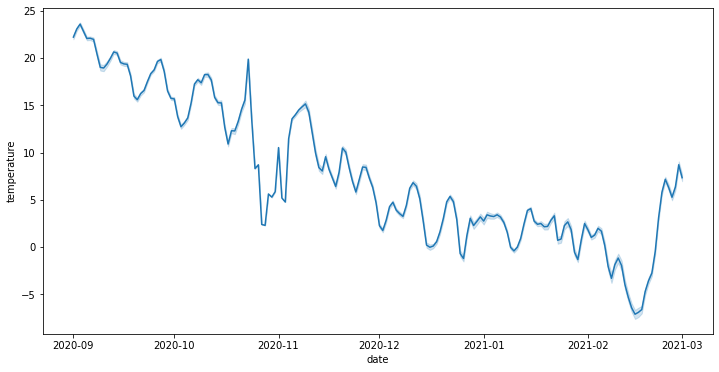

In [62]:
# overall date vs temp
plt.figure(figsize = (12,6))
sns.lineplot(x = 'date', y = 'temperature', data = df_covid)

In [63]:
# overall temp vs cases
df_covid[['temperature','covid_19_confirmed_cases','precipitation']].corr()

,temperature,covid_19_confirmed_cases,precipitation
temperature,1.000000,-0.004110,0.064128
covid_19_confirmed_cases,-0.004110,1.000000,-0.007344
precipitation,0.064128,-0.007344,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='date', ylabel='covid_19_confirmed_cases'>

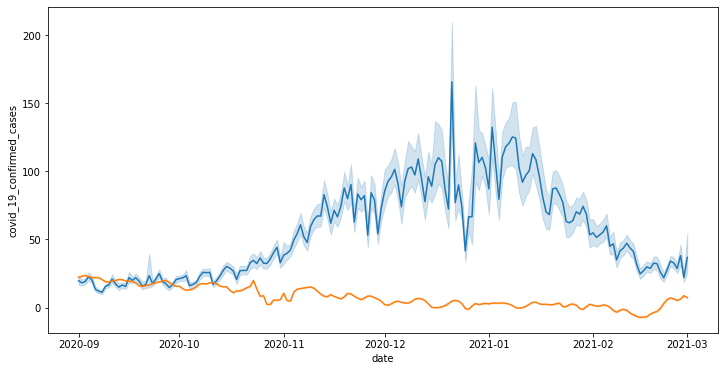

In [64]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'date', y = 'covid_19_confirmed_cases', data = df_covid)
sns.lineplot(x = 'date', y = 'temperature', data = df_covid)
#sns.lineplot(x = 'date', y = 'precipitation', data = df_covid)

DURING WINTERS CASES INCREASED, MAY BE BECAUSE PEOPLE STAYING MOSTLY INSIDE PUBLIC PLACE WHICH WAS A MAJOR FACTOR OF CASE SPREAD, DIRECTLY THEY ARE NOT CORRELATED. PRECIPITATION HAS NO RELATION.

In [65]:
# top high POPULATED counties
high_case = df_covid.groupby(['state_fips'])['population_density'].mean().sort_values(ascending = False)
high_case_10 = list(high_case.index[:10])
high_case_10

[34, 36, 25, 44, 6, 9, 10, 24, 51, 42]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='state_name', ylabel='population_density'>

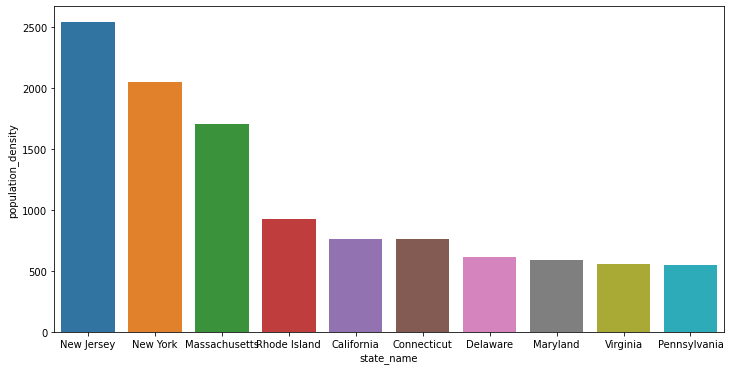

In [66]:
# TOP 10 STATES 
plt.figure(figsize = (12,6))
temp = df_covid.groupby(['state_fips',
                         'state_name'])['population_density'].mean().sort_values(ascending = False).reset_index()
sns.barplot(x = 'state_name',y = 'population_density', data = temp[:10])

THIS ARE THE TOP STATES BASED ON POPULATION DENSITY AND THE FOLLOWING WILL BE USED FOR FURTHER ANALYSIS

In [67]:
# number of counties in top high case counties
for i in high_case_10:
    print(i," : ",len(df_covid[df_covid['state_fips'] ==i]['county_fips'].unique()))

34  :  18
36  :  54
25  :  14
44  :  4
6  :  54
9  :  7
10  :  3
24  :  17
51  :  61
42  :  55


In [68]:
# t test one sample to check if sample qualify as a representation of population
from scipy import stats
def one_sample_one_tailed(sample_data, popmean, alpha=0.05, alternative='two-sided'):
    t, p = stats.ttest_1samp(sample_data, popmean)
    print ('t:',t)
    print ('p:',p)
    if alternative == 'greater' and (p/2 < alpha) and t > 0:
        print ('Reject Null Hypothesis for greater-than test')
    if alternative == 'less' and (p/2 < alpha) and t < 0:
        print ('Reject Null Hypothesis for less-thane test')
    if alternative == 'two-sided' and (p/2 < alpha) and t != 0:
        print ('Reject Null Hypothesis for not-equal test') 
one_sample_one_tailed(df_covid[df_covid['state_fips'].isin(high_case_10)]['population_density']
                      ,df_covid['population_density'].mean())  

t: 36.55751630387124
p: 6.134631798466841e-289
Reject Null Hypothesis for not-equal test


In [69]:
print(df_covid[df_covid['state_fips'].isin(high_case_10)]['population_density'].mean())
print(df_covid['population_density'].mean())

1070.1621946717457
310.43229803408633


T TEST PASSES FOR OUR SAMPLE

In [70]:
# groupby for top population
covid_climate = df_covid[df_covid['state_fips'].isin(high_case_10)].groupby(['date',
                                                             'state_fips'])[['covid_19_confirmed_cases',
                'covid_19_deaths','daily_state_test','precipitation','temperature','virus_pressure']].sum().reset_index()
covid_climate.head()

,date,state_fips,covid_19_confirmed_cases,covid_19_deaths,daily_state_test,precipitation,temperature,virus_pressure
0,2020-09-01,6,4241.0,145.0,5259114.0,39.6,1265.30,4166.347619
1,2020-09-01,9,119.0,1.0,143367.0,5.0,125.90,140.257143
2,2020-09-01,10,80.0,0.0,8655.0,36.0,67.86,42.482143
3,2020-09-01,24,501.0,5.0,232135.0,871.0,368.04,390.348810
4,2020-09-01,25,342.0,3.0,614810.0,0.0,251.50,291.944048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1440x1440 with 0 Axes>

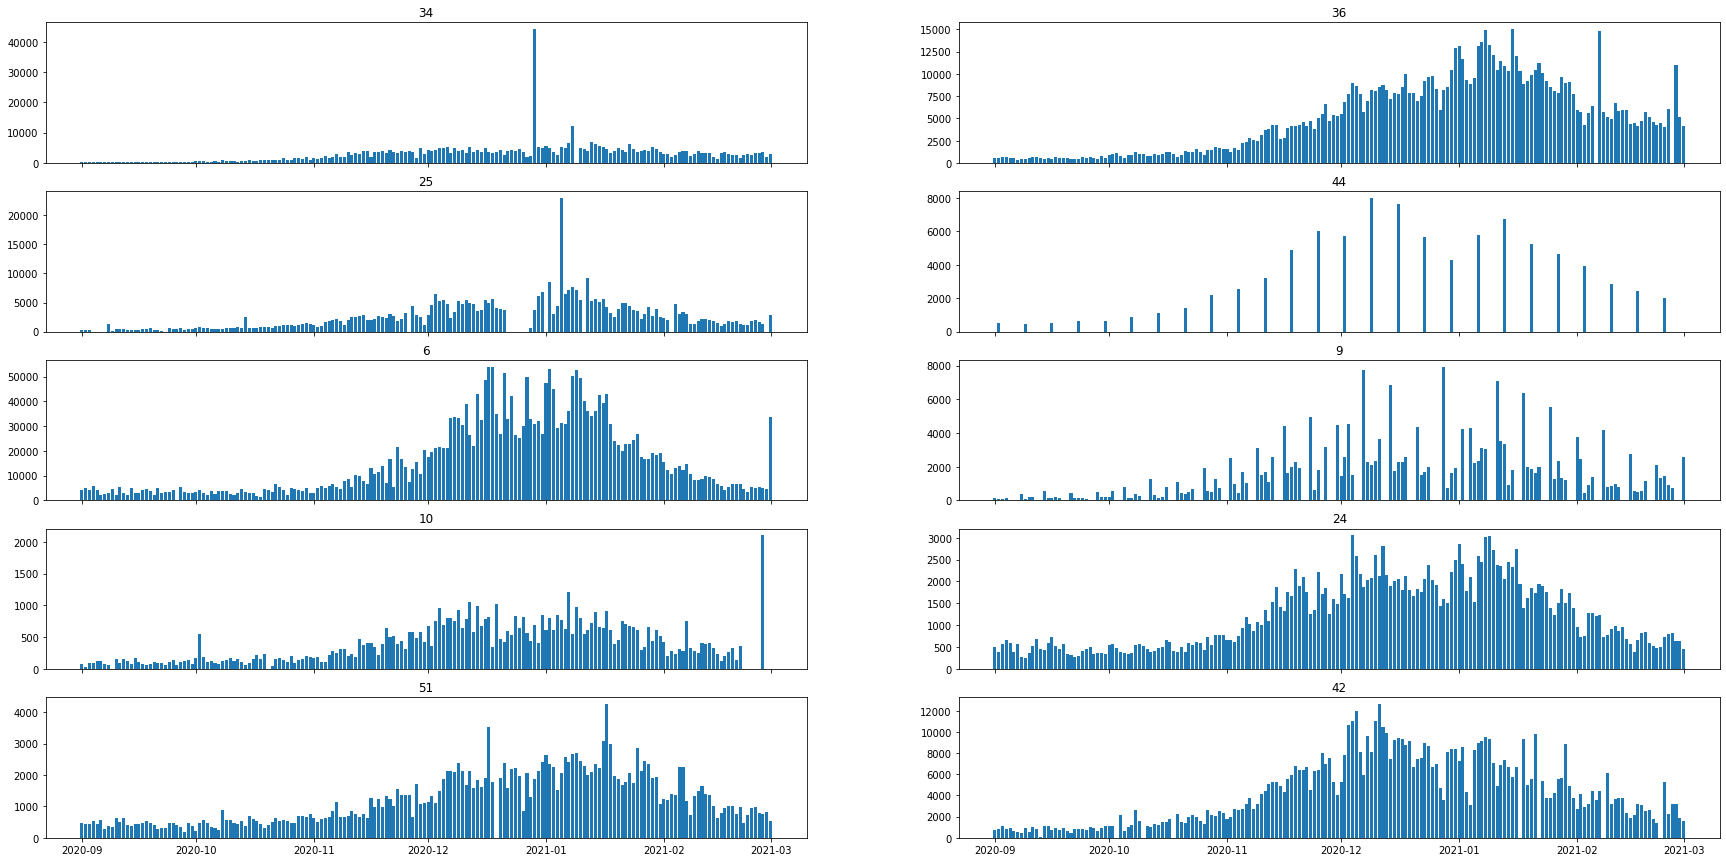

In [71]:
#top states with covid_19_confirmed_cases
plt.figure(figsize = (20,20))
fig,axes = plt.subplots(5,2,sharex = True,figsize = (30,15))

for i,ax in zip(high_case_10, axes.flat):    
    ax.bar(covid_climate.loc[np.where(covid_climate["state_fips"] == i)[0],'date'],covid_climate.loc[
        np.where(covid_climate["state_fips"] == i)[0],'covid_19_confirmed_cases'])
    ax.set_title(i)
    plt.title(str(i))

THE COVID CASES ARE NOT ACCUMULATED ! ALSO ALL STATES HAVE A SIMILAR PATTERN STATING THAT MAJOR SPREAD DURING WINTERS

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 864x432 with 0 Axes>

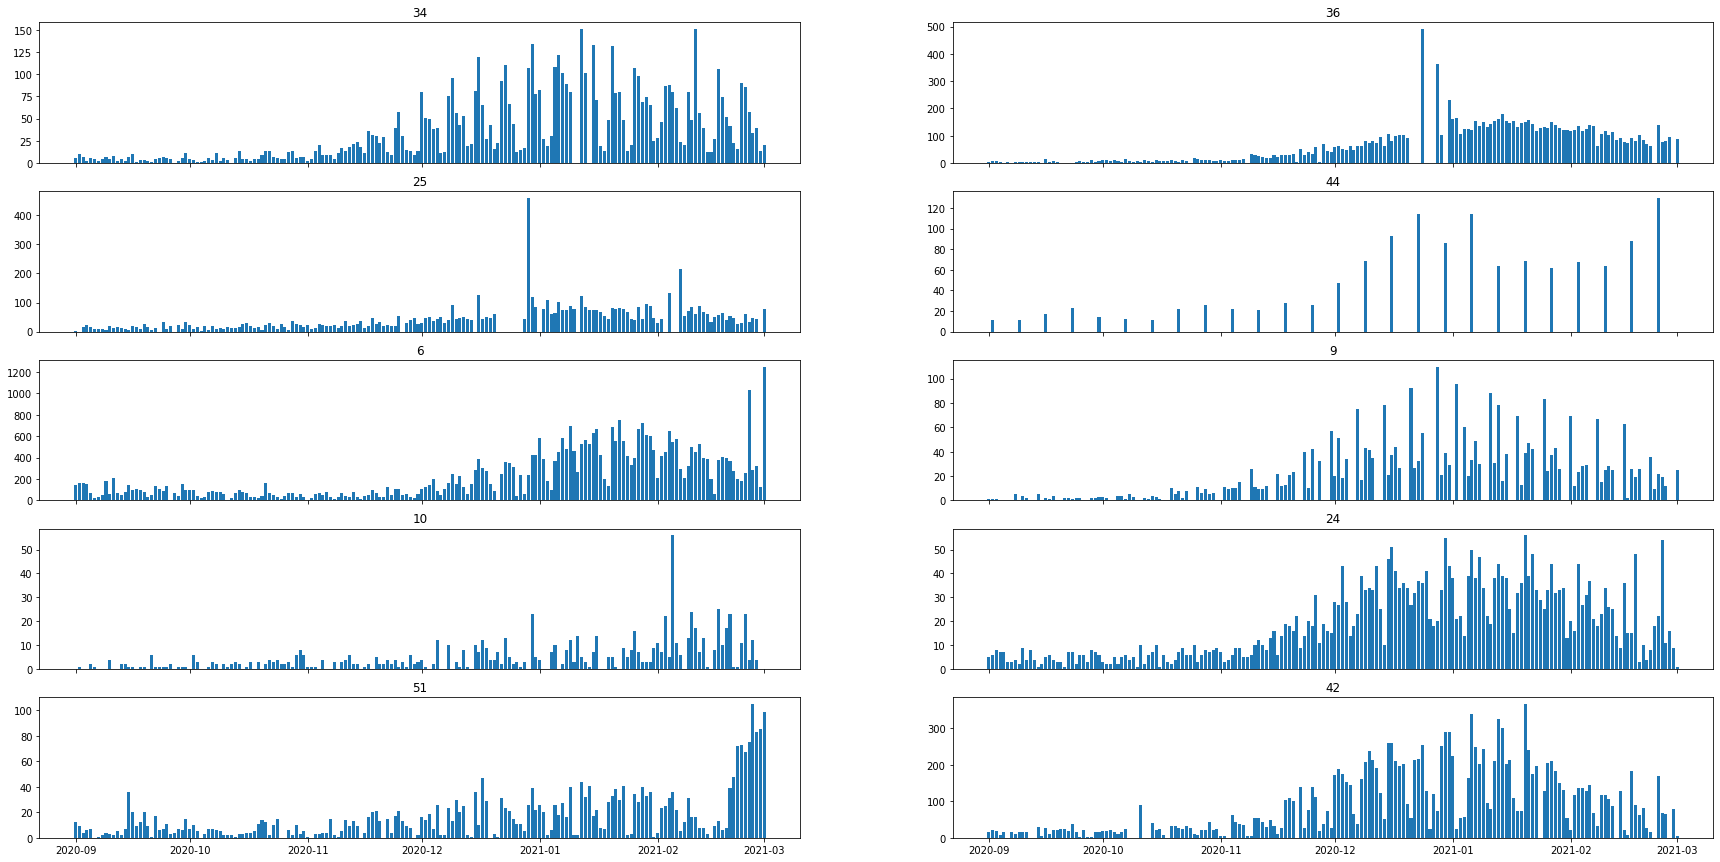

In [72]:
# top states with covid_19_DEATHS
plt.figure(figsize = (12,6))
fig,axes = plt.subplots(5,2,sharex = True,figsize = (30,15))

for i,ax in zip(high_case_10, axes.flat):    
    ax.bar(covid_climate.loc[np.where(covid_climate["state_fips"] == i)[0],'date'],covid_climate.loc[
        np.where(covid_climate["state_fips"] == i)[0],'covid_19_deaths'])
    ax.set_title(i)
    plt.title(str(i))

THE PATTERNS ARE SIMILAR TO COVID CASES . ALSO THE IS A SPIKE IN DEATH DURING INITIAL SPREAD AS WELL AS WINTERS.

<IPython.core.display.Javascript object>

state :  34
                          covid_19_confirmed_cases  covid_19_deaths
covid_19_confirmed_cases                  1.000000         0.448369
covid_19_deaths                           0.448369         1.000000


<IPython.core.display.Javascript object>

state :  34
                          covid_19_confirmed_cases  covid_19_deaths
covid_19_confirmed_cases                  1.000000         0.706915
covid_19_deaths                           0.706915         1.000000


<IPython.core.display.Javascript object>

state :  34
                          covid_19_confirmed_cases  covid_19_deaths
covid_19_confirmed_cases                  1.000000         0.440941
covid_19_deaths                           0.440941         1.000000


<IPython.core.display.Javascript object>

state :  34
                          covid_19_confirmed_cases  covid_19_deaths
covid_19_confirmed_cases                  1.000000         0.841429
covid_19_deaths                           0.841429         1.000000


<IPython.core.display.Javascript object>

state :  34
                          covid_19_confirmed_cases  covid_19_deaths
covid_19_confirmed_cases                  1.000000         0.449597
covid_19_deaths                           0.449597         1.000000


<IPython.core.display.Javascript object>

state :  34
                          covid_19_confirmed_cases  covid_19_deaths
covid_19_confirmed_cases                  1.000000         0.877793
covid_19_deaths                           0.877793         1.000000


<IPython.core.display.Javascript object>

state :  34
                          covid_19_confirmed_cases  covid_19_deaths
covid_19_confirmed_cases                  1.000000         0.056939
covid_19_deaths                           0.056939         1.000000


<IPython.core.display.Javascript object>

state :  34
                          covid_19_confirmed_cases  covid_19_deaths
covid_19_confirmed_cases                  1.000000         0.705636
covid_19_deaths                           0.705636         1.000000


<IPython.core.display.Javascript object>

state :  34
                          covid_19_confirmed_cases  covid_19_deaths
covid_19_confirmed_cases                  1.000000         0.216078
covid_19_deaths                           0.216078         1.000000


<IPython.core.display.Javascript object>

state :  34
                          covid_19_confirmed_cases  covid_19_deaths
covid_19_confirmed_cases                  1.000000         0.723371
covid_19_deaths                           0.723371         1.000000


<IPython.core.display.Javascript object>

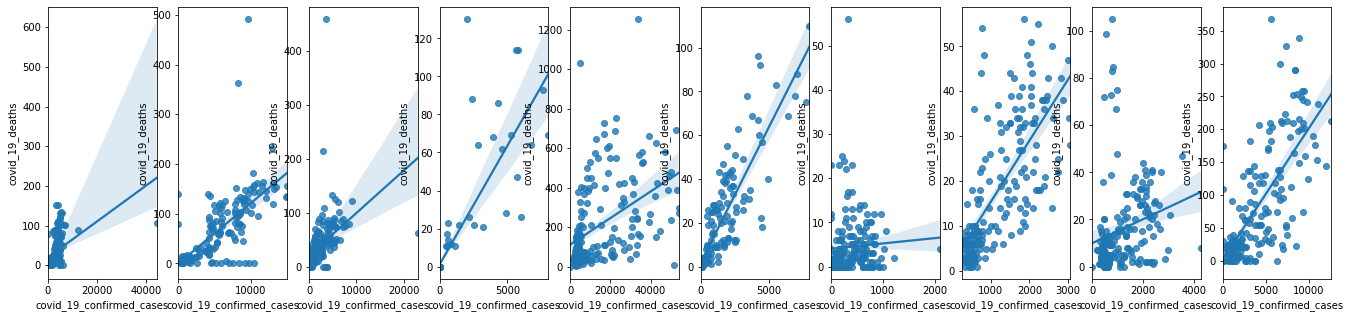

In [73]:
# confirmed case vs death
fig, axs = plt.subplots(ncols=10,figsize = (23,5))
for i in range(len(high_case_10)):
    print('state : ',high_case_10[0])
    print(covid_climate[covid_climate['state_fips'] == high_case_10[i]][['covid_19_confirmed_cases',
                                                                         'covid_19_deaths']].corr())
    sns.regplot("covid_19_confirmed_cases", "covid_19_deaths",
           data = covid_climate[covid_climate['state_fips'] == high_case_10[i]],ax=axs[i])

HERE WERE THAT THERE IS A CORRELATION OF COVID CASES WITH COVID DEATHS . THE RELATIONSHIP IS LOW AS IT IS PERIODICAL

<IPython.core.display.Javascript object>

state :  34
                          covid_19_confirmed_cases  daily_state_test
covid_19_confirmed_cases                  1.000000          0.081137
daily_state_test                          0.081137          1.000000


<IPython.core.display.Javascript object>

state :  36
                          covid_19_confirmed_cases  daily_state_test
covid_19_confirmed_cases                  1.000000          0.757486
daily_state_test                          0.757486          1.000000


<IPython.core.display.Javascript object>

state :  25
                          covid_19_confirmed_cases  daily_state_test
covid_19_confirmed_cases                  1.000000          0.388598
daily_state_test                          0.388598          1.000000


<IPython.core.display.Javascript object>

state :  44
                          covid_19_confirmed_cases  daily_state_test
covid_19_confirmed_cases                  1.000000          0.129423
daily_state_test                          0.129423          1.000000


<IPython.core.display.Javascript object>

state :  6
                          covid_19_confirmed_cases  daily_state_test
covid_19_confirmed_cases                  1.000000          0.775313
daily_state_test                          0.775313          1.000000


<IPython.core.display.Javascript object>

state :  9
                          covid_19_confirmed_cases  daily_state_test
covid_19_confirmed_cases                   1.00000           0.18453
daily_state_test                           0.18453           1.00000


<IPython.core.display.Javascript object>

state :  10
                          covid_19_confirmed_cases  daily_state_test
covid_19_confirmed_cases                  1.000000          0.616988
daily_state_test                          0.616988          1.000000


<IPython.core.display.Javascript object>

state :  24
                          covid_19_confirmed_cases  daily_state_test
covid_19_confirmed_cases                  1.000000          0.767326
daily_state_test                          0.767326          1.000000


<IPython.core.display.Javascript object>

state :  51
                          covid_19_confirmed_cases  daily_state_test
covid_19_confirmed_cases                  1.000000          0.585882
daily_state_test                          0.585882          1.000000


<IPython.core.display.Javascript object>

state :  42
                          covid_19_confirmed_cases  daily_state_test
covid_19_confirmed_cases                  1.000000          0.669853
daily_state_test                          0.669853          1.000000


<IPython.core.display.Javascript object>

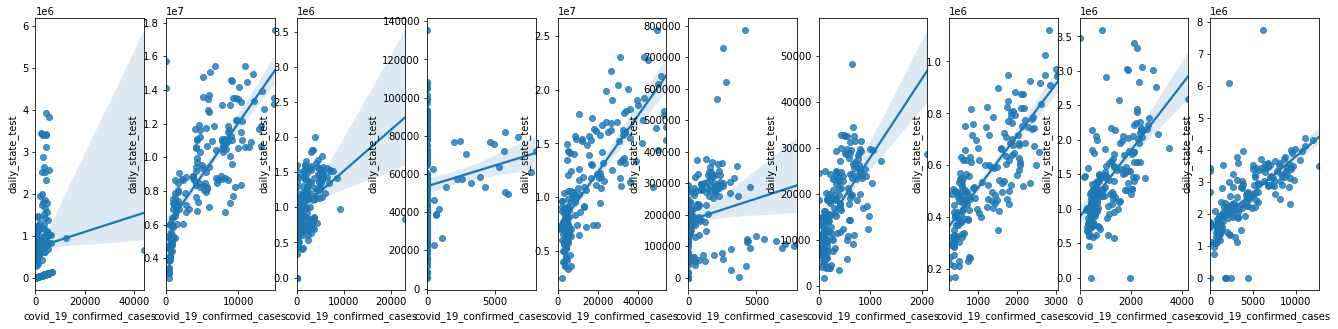

In [74]:
# confirmed case vs daily test
fig, axs = plt.subplots(ncols=10,figsize = (23,5))

for i in range(len(high_case_10)):
    print('state : ',high_case_10[i])
    print(covid_climate[covid_climate['state_fips'] == high_case_10[i]][['covid_19_confirmed_cases'
                                                                     ,'daily_state_test']].corr())
    sns.regplot("covid_19_confirmed_cases", "daily_state_test",
           data = covid_climate[covid_climate['state_fips'] == high_case_10[i]],ax=axs[i])

HERE WERE THAT THERE IS A CORRELATION OF COVID CASES WITH COVID TEST . THE RELATIONSHIP IS HIGH IN SOME CASES AND LOW IN OTHERS. IT MAY BE BECAUSE OF DIFFERENT POPULATION DENSITY

<IPython.core.display.Javascript object>

state :  34
                          temperature  covid_19_confirmed_cases
temperature                  1.000000                 -0.383164
covid_19_confirmed_cases    -0.383164                  1.000000


<IPython.core.display.Javascript object>

state :  36
                          temperature  covid_19_confirmed_cases
temperature                  1.000000                 -0.706642
covid_19_confirmed_cases    -0.706642                  1.000000


<IPython.core.display.Javascript object>

state :  25
                          temperature  covid_19_confirmed_cases
temperature                  1.000000                 -0.431117
covid_19_confirmed_cases    -0.431117                  1.000000


<IPython.core.display.Javascript object>

state :  44
                          temperature  covid_19_confirmed_cases
temperature                  1.000000                 -0.167425
covid_19_confirmed_cases    -0.167425                  1.000000


<IPython.core.display.Javascript object>

state :  6
                          temperature  covid_19_confirmed_cases
temperature                  1.000000                 -0.490209
covid_19_confirmed_cases    -0.490209                  1.000000


<IPython.core.display.Javascript object>

state :  9
                          temperature  covid_19_confirmed_cases
temperature                  1.000000                 -0.346222
covid_19_confirmed_cases    -0.346222                  1.000000


<IPython.core.display.Javascript object>

state :  10
                          temperature  covid_19_confirmed_cases
temperature                  1.000000                 -0.498689
covid_19_confirmed_cases    -0.498689                  1.000000


<IPython.core.display.Javascript object>

state :  24
                          temperature  covid_19_confirmed_cases
temperature                  1.000000                 -0.526296
covid_19_confirmed_cases    -0.526296                  1.000000


<IPython.core.display.Javascript object>

state :  51
                          temperature  covid_19_confirmed_cases
temperature                  1.000000                 -0.617506
covid_19_confirmed_cases    -0.617506                  1.000000


<IPython.core.display.Javascript object>

state :  42
                          temperature  covid_19_confirmed_cases
temperature                  1.000000                 -0.536449
covid_19_confirmed_cases    -0.536449                  1.000000


<IPython.core.display.Javascript object>

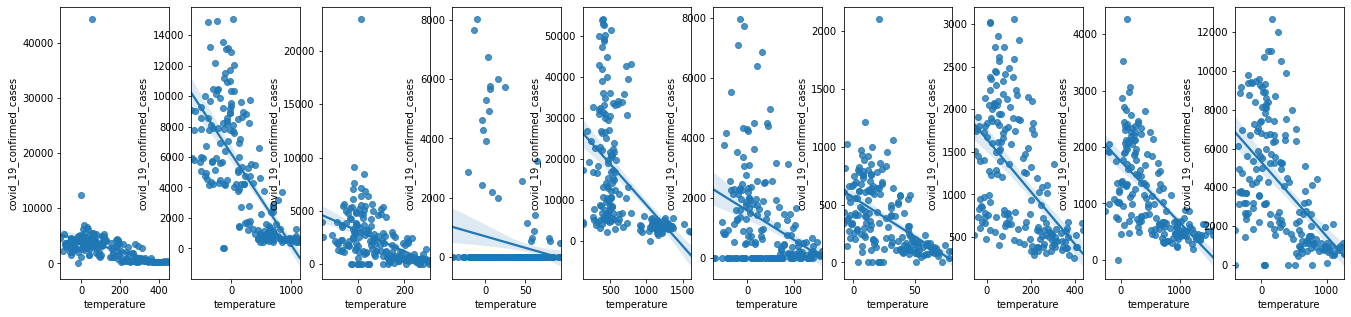

In [75]:
# temperature vs confirmed cases
fig, axs = plt.subplots(ncols=10,figsize = (23,5))

for i in range(len(high_case_10)):
    print('state : ',high_case_10[i])
    print(covid_climate[covid_climate['state_fips'] == high_case_10[i]][['temperature'
                                                                         ,'covid_19_confirmed_cases']].corr())
    sns.regplot("temperature", "covid_19_confirmed_cases",
               data = covid_climate[covid_climate['state_fips'] == high_case_10[i]],ax=axs[i])
   

HERE THERE IS NO DIRECT RELATIONSHIP BETWEEN TEMPERATURE VS COVID CASES

<IPython.core.display.Javascript object>

state :  34
                  temperature  daily_state_test
temperature          1.000000         -0.188569
daily_state_test    -0.188569          1.000000


<IPython.core.display.Javascript object>

state :  36
                  temperature  daily_state_test
temperature          1.000000         -0.730642
daily_state_test    -0.730642          1.000000


<IPython.core.display.Javascript object>

state :  25
                  temperature  daily_state_test
temperature           1.00000          -0.42339
daily_state_test     -0.42339           1.00000


<IPython.core.display.Javascript object>

state :  44
                  temperature  daily_state_test
temperature          1.000000         -0.372419
daily_state_test    -0.372419          1.000000


<IPython.core.display.Javascript object>

state :  6
                  temperature  daily_state_test
temperature          1.000000         -0.576482
daily_state_test    -0.576482          1.000000


<IPython.core.display.Javascript object>

state :  9
                  temperature  daily_state_test
temperature          1.000000         -0.184303
daily_state_test    -0.184303          1.000000


<IPython.core.display.Javascript object>

state :  10
                  temperature  daily_state_test
temperature          1.000000         -0.530016
daily_state_test    -0.530016          1.000000


<IPython.core.display.Javascript object>

state :  24
                  temperature  daily_state_test
temperature          1.000000         -0.443753
daily_state_test    -0.443753          1.000000


<IPython.core.display.Javascript object>

state :  51
                  temperature  daily_state_test
temperature          1.000000         -0.442369
daily_state_test    -0.442369          1.000000


<IPython.core.display.Javascript object>

state :  42
                  temperature  daily_state_test
temperature          1.000000         -0.408921
daily_state_test    -0.408921          1.000000


<IPython.core.display.Javascript object>

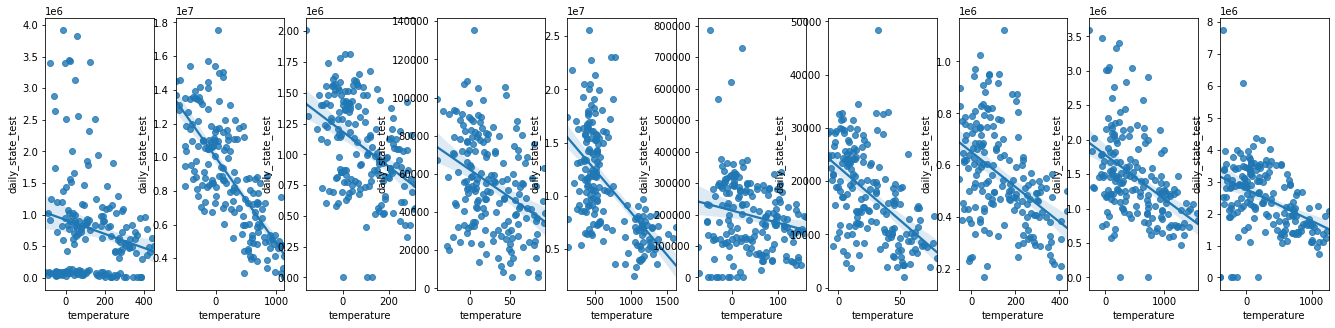

In [76]:
# temperature vs daily test
fig, axs = plt.subplots(ncols=10,figsize = (23,5))

for i in range(len(high_case_10)):
    print('state : ',high_case_10[i])
    print(covid_climate[covid_climate['state_fips'] == high_case_10[i]][['temperature'
                                                                 ,'daily_state_test']].corr())
    sns.regplot("temperature", "daily_state_test",
           data = covid_climate[covid_climate['state_fips'] == high_case_10[i]],ax=axs[i])

HIGH

<IPython.core.display.Javascript object>

state :  34
                  precipitation  daily_state_test
precipitation          1.000000         -0.031684
daily_state_test      -0.031684          1.000000


<IPython.core.display.Javascript object>

state :  34
                  precipitation  daily_state_test
precipitation          1.000000         -0.017389
daily_state_test      -0.017389          1.000000


<IPython.core.display.Javascript object>

state :  34
                  precipitation  daily_state_test
precipitation          1.000000         -0.054618
daily_state_test      -0.054618          1.000000


<IPython.core.display.Javascript object>

state :  34
                  precipitation  daily_state_test
precipitation          1.000000         -0.035519
daily_state_test      -0.035519          1.000000


<IPython.core.display.Javascript object>

state :  34
                  precipitation  daily_state_test
precipitation          1.000000          0.133949
daily_state_test       0.133949          1.000000


<IPython.core.display.Javascript object>

state :  34
                  precipitation  daily_state_test
precipitation           1.00000           0.04618
daily_state_test        0.04618           1.00000


<IPython.core.display.Javascript object>

state :  34
                  precipitation  daily_state_test
precipitation          1.000000         -0.048792
daily_state_test      -0.048792          1.000000


<IPython.core.display.Javascript object>

state :  34
                  precipitation  daily_state_test
precipitation          1.000000         -0.066962
daily_state_test      -0.066962          1.000000


<IPython.core.display.Javascript object>

state :  34
                  precipitation  daily_state_test
precipitation          1.000000         -0.192534
daily_state_test      -0.192534          1.000000


<IPython.core.display.Javascript object>

state :  34
                  precipitation  daily_state_test
precipitation           1.00000           0.09155
daily_state_test        0.09155           1.00000


<IPython.core.display.Javascript object>

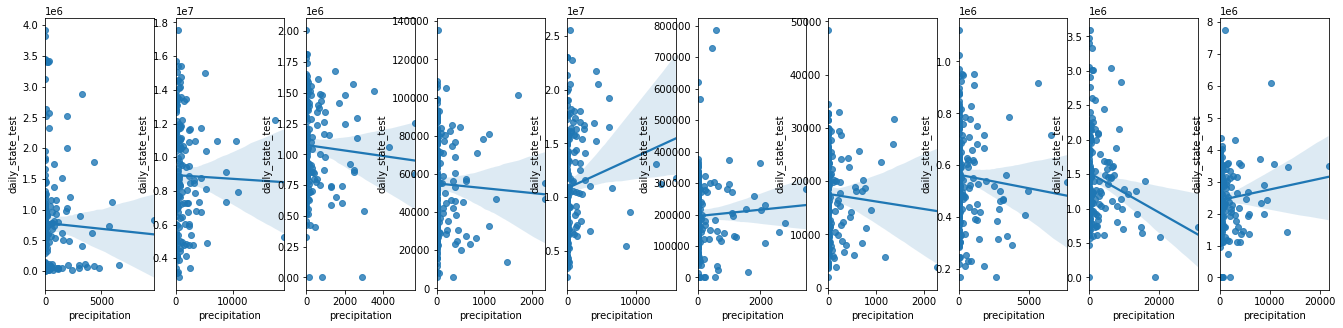

In [77]:
# precipitation vs daily test
fig, axs = plt.subplots(ncols=10,figsize = (23,5))

for i in range(len(high_case_10)):
    print('state : ',high_case_10[0])
    print(covid_climate[covid_climate['state_fips'] == high_case_10[i]][['precipitation'
                                                                         ,'daily_state_test']].corr())
    sns.regplot("precipitation", "daily_state_test",
               data = covid_climate[covid_climate['state_fips'] == high_case_10[i]],ax=axs[i])

NO RELATIONSHIP

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='date', ylabel='covid_19_deaths'>

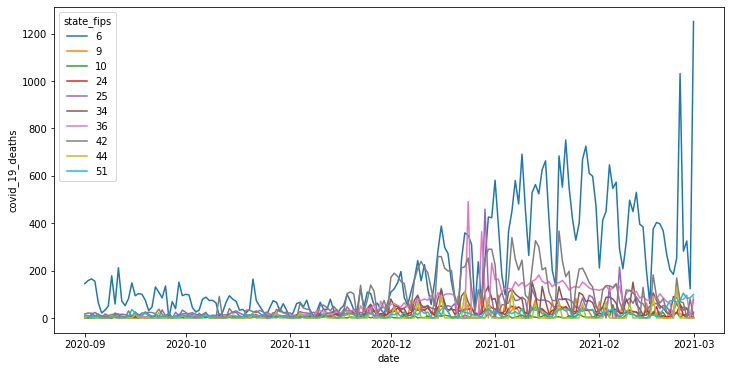

In [78]:
# top death in this five county
plt.figure(figsize = (12,6))
palette = sns.color_palette("tab10")
sns.lineplot(x = 'date', y = 'covid_19_deaths', hue = 'state_fips',data = covid_climate,palette = palette[:10])

In [79]:
# population_density vs total_population
# per county population density and total population stay same

<IPython.core.display.Javascript object>

state :  34
                          covid_19_confirmed_cases  virus_pressure
covid_19_confirmed_cases                  1.000000        0.978212
virus_pressure                            0.978212        1.000000


<IPython.core.display.Javascript object>

state :  36
                          covid_19_confirmed_cases  virus_pressure
covid_19_confirmed_cases                  1.000000        0.985522
virus_pressure                            0.985522        1.000000


<IPython.core.display.Javascript object>

state :  25
                          covid_19_confirmed_cases  virus_pressure
covid_19_confirmed_cases                  1.000000        0.970017
virus_pressure                            0.970017        1.000000


<IPython.core.display.Javascript object>

state :  44
                          covid_19_confirmed_cases  virus_pressure
covid_19_confirmed_cases                  1.000000        0.823515
virus_pressure                            0.823515        1.000000


<IPython.core.display.Javascript object>

state :  6
                          covid_19_confirmed_cases  virus_pressure
covid_19_confirmed_cases                  1.000000        0.999218
virus_pressure                            0.999218        1.000000


<IPython.core.display.Javascript object>

state :  9
                          covid_19_confirmed_cases  virus_pressure
covid_19_confirmed_cases                  1.000000        0.859744
virus_pressure                            0.859744        1.000000


<IPython.core.display.Javascript object>

state :  10
                          covid_19_confirmed_cases  virus_pressure
covid_19_confirmed_cases                  1.000000        0.746231
virus_pressure                            0.746231        1.000000


<IPython.core.display.Javascript object>

state :  24
                          covid_19_confirmed_cases  virus_pressure
covid_19_confirmed_cases                  1.000000        0.976177
virus_pressure                            0.976177        1.000000


<IPython.core.display.Javascript object>

state :  51
                          covid_19_confirmed_cases  virus_pressure
covid_19_confirmed_cases                    1.0000          0.9778
virus_pressure                              0.9778          1.0000


<IPython.core.display.Javascript object>

state :  42
                          covid_19_confirmed_cases  virus_pressure
covid_19_confirmed_cases                  1.000000        0.996282
virus_pressure                            0.996282        1.000000


<IPython.core.display.Javascript object>

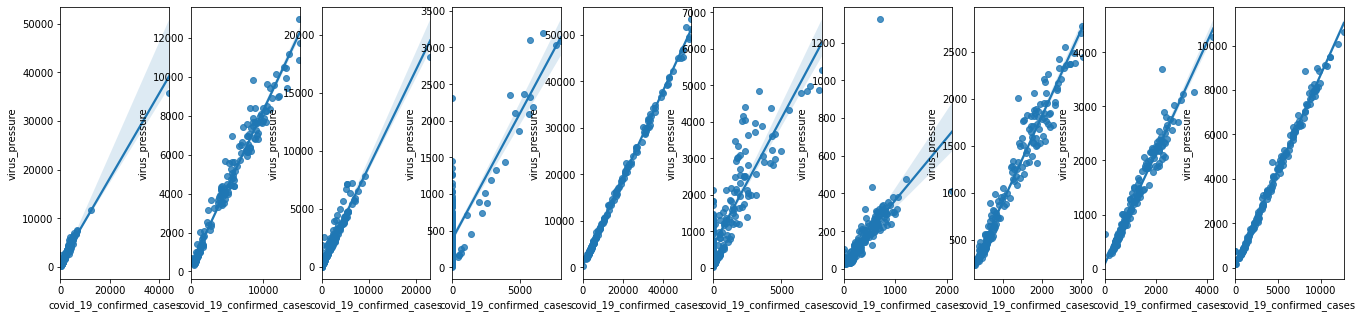

In [80]:
# confirmed case vs virus_pressure
fig, axs = plt.subplots(ncols=10,figsize = (23,5))

for i in range(len(high_case_10)):
    print('state : ',high_case_10[i])
    print(covid_climate[covid_climate['state_fips'] == high_case_10[i]][['covid_19_confirmed_cases'
                                                                         ,'virus_pressure']].corr())
    sns.regplot("covid_19_confirmed_cases", "virus_pressure",
               data = covid_climate[covid_climate['state_fips'] == high_case_10[i]],ax=axs[i])

HERE THERE IS A VERY HIGH CORRELATION BETWEEN VIRUS PRESSURE VS COVID CASES

<IPython.core.display.Javascript object>

state :  34
                 covid_19_deaths  virus_pressure
covid_19_deaths         1.000000        0.547371
virus_pressure          0.547371        1.000000


<IPython.core.display.Javascript object>

state :  36
                 covid_19_deaths  virus_pressure
covid_19_deaths         1.000000        0.709873
virus_pressure          0.709873        1.000000


<IPython.core.display.Javascript object>

state :  25
                 covid_19_deaths  virus_pressure
covid_19_deaths         1.000000        0.472636
virus_pressure          0.472636        1.000000


<IPython.core.display.Javascript object>

state :  44
                 covid_19_deaths  virus_pressure
covid_19_deaths         1.000000        0.692718
virus_pressure          0.692718        1.000000


<IPython.core.display.Javascript object>

state :  6
                 covid_19_deaths  virus_pressure
covid_19_deaths         1.000000        0.439686
virus_pressure          0.439686        1.000000


<IPython.core.display.Javascript object>

state :  9
                 covid_19_deaths  virus_pressure
covid_19_deaths         1.000000        0.847725
virus_pressure          0.847725        1.000000


<IPython.core.display.Javascript object>

state :  10
                 covid_19_deaths  virus_pressure
covid_19_deaths         1.000000        0.098067
virus_pressure          0.098067        1.000000


<IPython.core.display.Javascript object>

state :  24
                 covid_19_deaths  virus_pressure
covid_19_deaths         1.000000        0.745061
virus_pressure          0.745061        1.000000


<IPython.core.display.Javascript object>

state :  51
                 covid_19_deaths  virus_pressure
covid_19_deaths         1.000000        0.214165
virus_pressure          0.214165        1.000000


<IPython.core.display.Javascript object>

state :  42
                 covid_19_deaths  virus_pressure
covid_19_deaths         1.000000        0.735631
virus_pressure          0.735631        1.000000


<IPython.core.display.Javascript object>

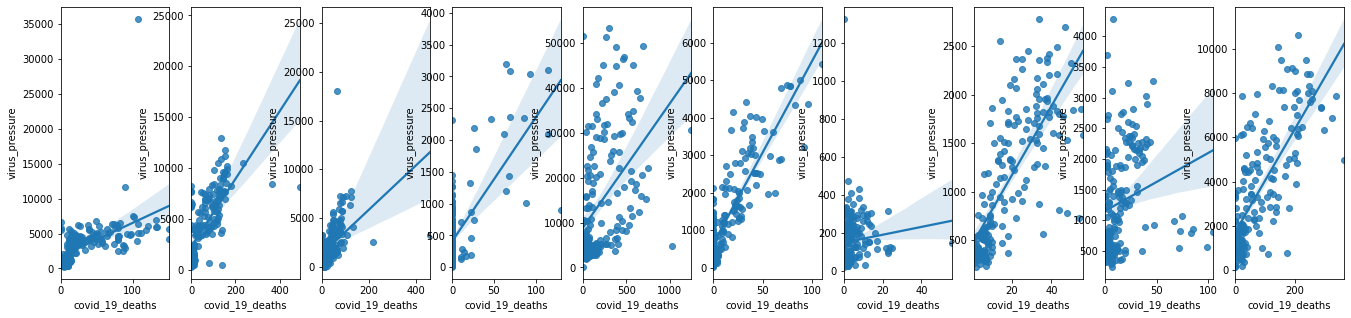

In [81]:
# covid death vs virus_pressure
fig, axs = plt.subplots(ncols=10,figsize = (23,5))

for i in range(len(high_case_10)):
    print('state : ',high_case_10[i])
    print(covid_climate[covid_climate['state_fips'] == high_case_10[i]][['covid_19_deaths'
                                                                         ,'virus_pressure']].corr())
    sns.regplot("covid_19_deaths", "virus_pressure",
               data = covid_climate[covid_climate['state_fips'] == high_case_10[i]],ax=axs[i])

HERE THERE IS A SIGNIFICANT RELATION BUT NOT DIRECTLY CORRELATED

<IPython.core.display.Javascript object>

state :  34
                  daily_state_test  virus_pressure
daily_state_test          1.000000        0.121065
virus_pressure            0.121065        1.000000


<IPython.core.display.Javascript object>

state :  36
                  daily_state_test  virus_pressure
daily_state_test          1.000000        0.739083
virus_pressure            0.739083        1.000000


<IPython.core.display.Javascript object>

state :  25
                  daily_state_test  virus_pressure
daily_state_test          1.000000        0.414309
virus_pressure            0.414309        1.000000


<IPython.core.display.Javascript object>

state :  44
                  daily_state_test  virus_pressure
daily_state_test          1.000000        0.275987
virus_pressure            0.275987        1.000000


<IPython.core.display.Javascript object>

state :  6
                  daily_state_test  virus_pressure
daily_state_test          1.000000        0.774413
virus_pressure            0.774413        1.000000


<IPython.core.display.Javascript object>

state :  9
                  daily_state_test  virus_pressure
daily_state_test          1.000000        0.273653
virus_pressure            0.273653        1.000000


<IPython.core.display.Javascript object>

state :  10
                  daily_state_test  virus_pressure
daily_state_test           1.00000         0.56737
virus_pressure             0.56737         1.00000


<IPython.core.display.Javascript object>

state :  24
                  daily_state_test  virus_pressure
daily_state_test          1.000000        0.749345
virus_pressure            0.749345        1.000000


<IPython.core.display.Javascript object>

state :  51
                  daily_state_test  virus_pressure
daily_state_test          1.000000        0.577033
virus_pressure            0.577033        1.000000


<IPython.core.display.Javascript object>

state :  42
                  daily_state_test  virus_pressure
daily_state_test          1.000000        0.666098
virus_pressure            0.666098        1.000000


<IPython.core.display.Javascript object>

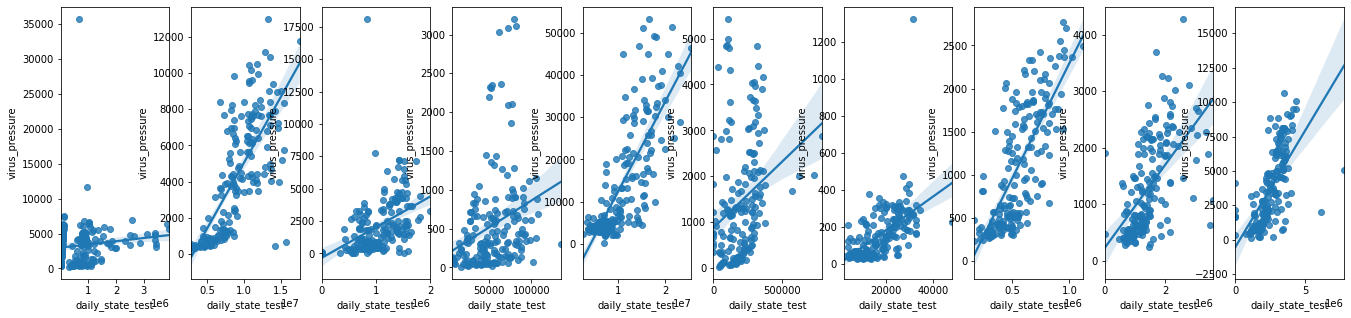

In [82]:
# daily_state_test vs virus_pressure
fig, axs = plt.subplots(ncols=10,figsize = (23,5))

for i in range(len(high_case_10)):
    print('state : ',high_case_10[i])
    print(covid_climate[covid_climate['state_fips'] == high_case_10[i]][['daily_state_test'
                                                                         ,'virus_pressure']].corr())
    sns.regplot("daily_state_test", "virus_pressure",
               data = covid_climate[covid_climate['state_fips'] == high_case_10[i]],ax=axs[i])

THERE IS A SIGNIFICANT CORRELATION

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='state', ylabel='death_ratio_mean'>

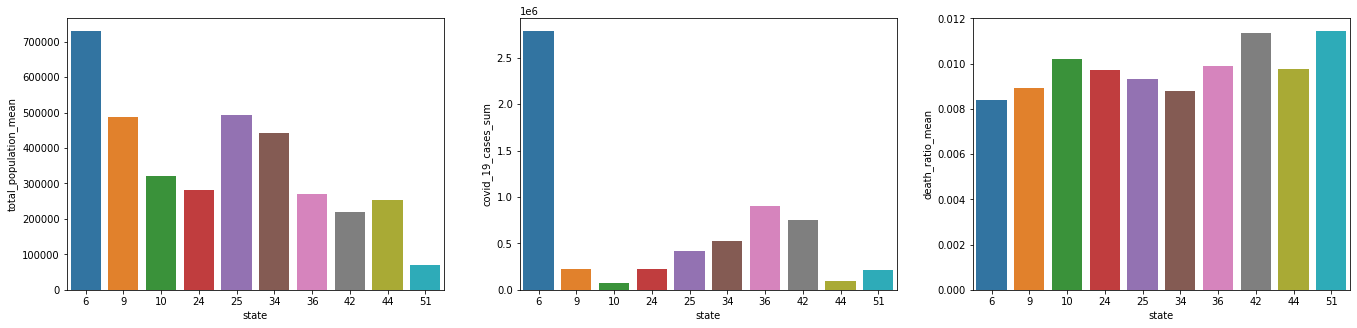

In [83]:
# total_population vs covid cases vs death ratio

covid_sum = []
pop_mean = []
death_mean = []
#print('state : ',high_case_10[0])
for i in range(len(high_case_10)):
    covid_sum.append(df_covid[df_covid['state_fips'] == high_case_10[i]]['covid_19_confirmed_cases'].sum())
    pop_mean.append(df_covid[df_covid['state_fips'] == high_case_10[i]]['total_population'].mean())
    death_mean.append(df_covid[df_covid['state_fips'] == high_case_10[i]]['death_ratio'].mean())


df_ta1 = pd.DataFrame({'state':high_case_10,'covid_19_cases_sum':covid_sum,
                       'total_population_mean':pop_mean,'death_ratio_mean':death_mean})

fig, axs = plt.subplots(ncols=3,figsize = (23,5))
sns.barplot(x = 'state',y ='covid_19_cases_sum',data = df_ta1 ,ax = axs[1])
sns.barplot(x = 'state',y ='total_population_mean',data = df_ta1 ,ax = axs[0])
sns.barplot(x = 'state',y ='death_ratio_mean',data = df_ta1 ,ax = axs[2])

In [84]:
df_ta1.corr()

,state,covid_19_cases_sum,total_population_mean,death_ratio_mean
state,1.000000,-0.364165,-0.775510,0.660821
covid_19_cases_sum,-0.364165,1.000000,0.667029,-0.415283
total_population_mean,-0.775510,0.667029,1.000000,-0.875861
death_ratio_mean,0.660821,-0.415283,-0.875861,1.000000


Death ratio is low where high covid cases

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='state_fips', ylabel='covid_19_deaths'>

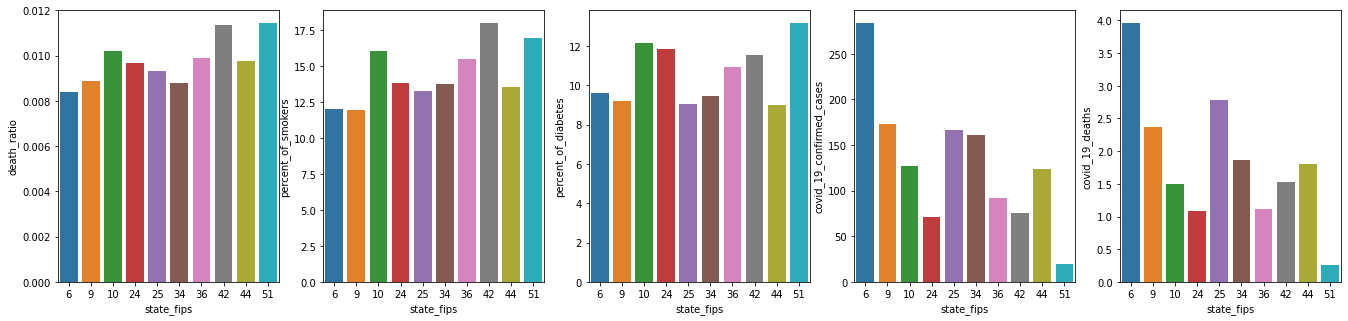

In [85]:
# death ratio, percent of smoker, diabetes, covid 19 death, covid 19 cases 

death_relation = df_covid[df_covid['state_fips'].isin(high_case_10)].groupby(['state_fips'])[['death_ratio',
            'percent_of_smokers','percent_of_diabetes','covid_19_deaths','covid_19_confirmed_cases']].mean().reset_index()

fig, axs = plt.subplots(ncols=5,figsize = (23,5))
sns.barplot(x = 'state_fips',y ='death_ratio',data = death_relation ,ax = axs[0])
sns.barplot(x = 'state_fips',y ='percent_of_smokers',data = death_relation ,ax = axs[1])
sns.barplot(x = 'state_fips',y ='percent_of_diabetes',data = death_relation ,ax = axs[2])
sns.barplot(x = 'state_fips',y ='covid_19_confirmed_cases',data = death_relation ,ax = axs[3])
sns.barplot(x = 'state_fips',y ='covid_19_deaths',data = death_relation ,ax = axs[4])
#death_relation.head()

In [86]:
death_relation.corr()

,state_fips,death_ratio,percent_of_smokers,percent_of_diabetes,covid_19_deaths,covid_19_confirmed_cases
state_fips,1.000000,0.660821,0.593326,0.287079,-0.662770,-0.723100
death_ratio,0.660821,1.000000,0.925036,0.777324,-0.758868,-0.852028
percent_of_smokers,0.593326,0.925036,1.000000,0.777949,-0.708282,-0.753180
percent_of_diabetes,0.287079,0.777324,0.777949,1.000000,-0.737365,-0.720187
covid_19_deaths,-0.662770,-0.758868,-0.708282,-0.737365,1.000000,0.962384
covid_19_confirmed_cases,-0.723100,-0.852028,-0.753180,-0.720187,0.962384,1.000000


DEATH RATIO, SMOKERS , AND DIABETES HAVE RELATIONSHIP AMONG THEMSELF

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='state_fips', ylabel='covid_19_confirmed_cases'>

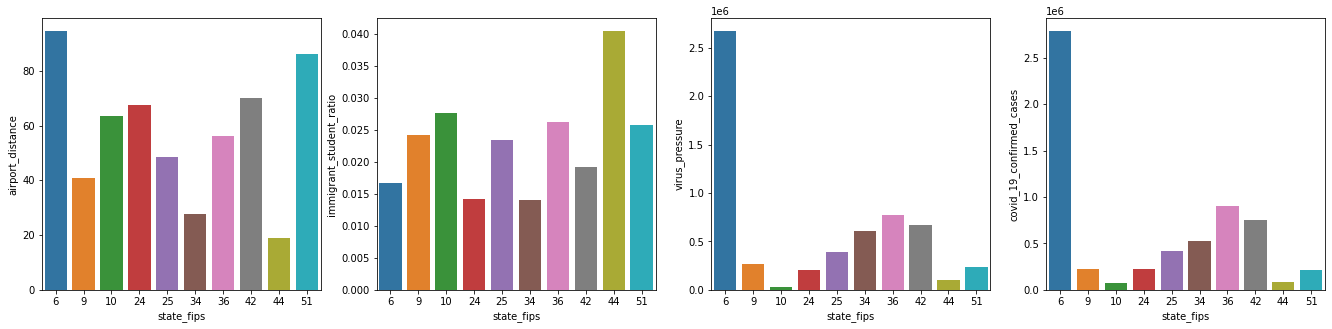

In [87]:
# airport distance , immigration student ratio covid cases , virus pressure
covid_spread1 = df_covid[df_covid['state_fips'].isin(high_case_10)].groupby(['state_fips'])[['airport_distance',
            'immigrant_student_ratio']].mean().reset_index()

covid_spread2 = df_covid[df_covid['state_fips'].isin(high_case_10)].groupby(['state_fips'])[['virus_pressure',
            'covid_19_confirmed_cases']].sum().reset_index()

fig, axs = plt.subplots(ncols=4,figsize = (23,5))
sns.barplot(x = 'state_fips',y ='airport_distance',data = covid_spread1 ,ax = axs[0])
sns.barplot(x = 'state_fips',y ='immigrant_student_ratio',data = covid_spread1 ,ax = axs[1])
sns.barplot(x = 'state_fips',y ='virus_pressure',data = covid_spread2 ,ax = axs[2])
sns.barplot(x = 'state_fips',y ='covid_19_confirmed_cases',data = covid_spread2 ,ax = axs[3])

In [88]:
covid_spread1.corr()

,state_fips,airport_distance,immigrant_student_ratio
state_fips,1.000000,-0.172397,0.290092
airport_distance,-0.172397,1.000000,-0.407152
immigrant_student_ratio,0.290092,-0.407152,1.000000


In [89]:
covid_spread2.corr()

,state_fips,virus_pressure,covid_19_confirmed_cases
state_fips,1.000000,-0.368813,-0.364165
virus_pressure,-0.368813,1.000000,0.997594
covid_19_confirmed_cases,-0.364165,0.997594,1.000000


HERE MORE THE DISTANCE LESS THE IMMIGRATION RATIO

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='state', ylabel='covid_19_cases_sum'>

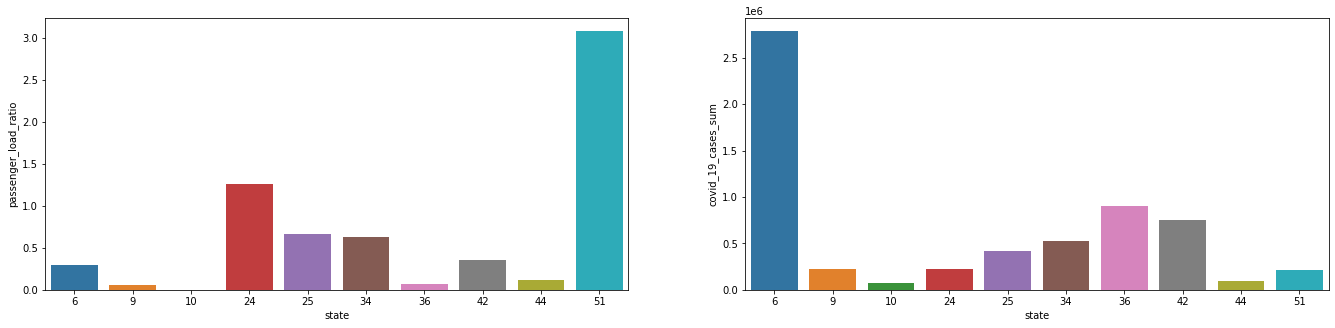

In [90]:
# geography
pass_load = []
cov_sum = []
for i in range(len(high_case_10)):
    pass_load.append(df_covid[df_covid['state_fips'] == high_case_10[i]]['passenger_load_ratio'].mean())
    cov_sum.append(df_covid[df_covid['state_fips'] == high_case_10[i]]['covid_19_confirmed_cases'].sum())

df_geo = pd.DataFrame({'state':high_case_10,'covid_19_cases_sum':cov_sum,
                       'passenger_load_ratio':pass_load})

fig, axs = plt.subplots(ncols=2,figsize = (23,5))
sns.barplot(x = 'state',y ='passenger_load_ratio',data = df_geo ,ax = axs[0])
sns.barplot(x = 'state',y ='covid_19_cases_sum',data = df_geo ,ax = axs[1])

In [91]:
df_geo.corr()

,state,covid_19_cases_sum,passenger_load_ratio
state,1.000000,-0.364165,0.498388
covid_19_cases_sum,-0.364165,1.000000,-0.192461
passenger_load_ratio,0.498388,-0.192461,1.000000


HERE PASSENGER RATIO LESS, MORE COVID CASES

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='state', ylabel='number_of_meat_plants'>

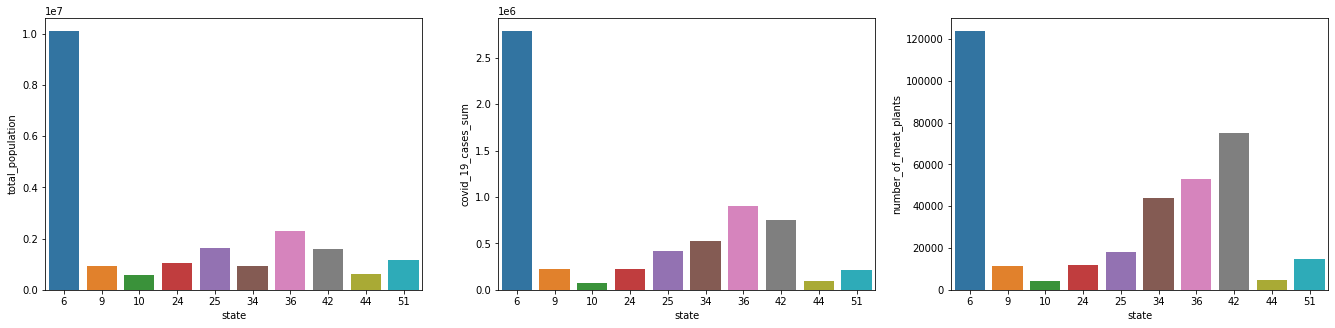

In [92]:
# geography
pop = []
cov_sum = []
meat_mean = []
for i in range(len(high_case_10)):
    pop.append(df_covid[df_covid['state_fips'] == high_case_10[i]]['total_population'].max())
    meat_mean.append(df_covid[df_covid['state_fips'] == high_case_10[i]]['number_of_meat_plants'].sum())
    cov_sum.append(df_covid[df_covid['state_fips'] == high_case_10[i]]['covid_19_confirmed_cases'].sum())

df_geo = pd.DataFrame({'state':high_case_10,'covid_19_cases_sum':cov_sum,
                       'number_of_meat_plants':meat_mean,'total_population':pop})

fig, axs = plt.subplots(ncols=3,figsize = (23,5))
sns.barplot(x = 'state',y ='total_population',data = df_geo ,ax = axs[0])
sns.barplot(x = 'state',y ='covid_19_cases_sum',data = df_geo ,ax = axs[1])
sns.barplot(x = 'state',y ='number_of_meat_plants',data = df_geo ,ax = axs[2])

MORE POPULATION , MORE MEAT PLANT. MORE POPULATION , MORE CASES. BUT WE CANNOT SAY MORE MEAT PLANT RESULT IN MORE CASES.